# 09wk-1: Numpy와 Pandas의 활용

최규빈  
2023-05-01

<a href="https://colab.research.google.com/github/guebin/PP2023/blob/main/posts/02_DataScience/2023-05-01-9wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 강의영상

> youtube:
> <https://youtube.com/playlist?list=PLQqh36zP38-w-stglh0uVkQxHpCT9lH9C>

# imports

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import urllib.request

# 회귀분석

`1--7`.

`1`. $x_i$가 아래와 같이 주어졌다고 가정하자.

In [2]:
x =  np.array([0.00983, 0.01098, 0.02951, 0.0384 , 0.03973, 0.04178, 0.0533 ,
               0.058  , 0.09454, 0.1103 , 0.1328 , 0.1412 , 0.1497 , 0.1664 ,
               0.1906 , 0.1923 , 0.198  , 0.2141 , 0.2393 , 0.2433 , 0.3157 ,
               0.3228 , 0.3418 , 0.3552 , 0.3918 , 0.3962 , 0.4    , 0.4482 ,
               0.496  , 0.507  , 0.53   , 0.5654 , 0.582  , 0.5854 , 0.5854 ,
               0.6606 , 0.7007 , 0.723  , 0.7305 , 0.7383 , 0.7656 , 0.7725 ,
               0.831  , 0.8896 , 0.9053 , 0.914  , 0.949  , 0.952  , 0.9727 ,
               0.982  ])

아래의 수식에 따라 $y_i$를 생성하라.

-   $y_i = 2+3x_i +\epsilon_i,\quad \epsilon_i \overset{iid}{\sim} N(0,1)$

$(x_i,y_i)$를 산점도를 이용하여 시각화하라.

(풀이)

In [4]:
y = 2+3*x + np.random.randn(50) 

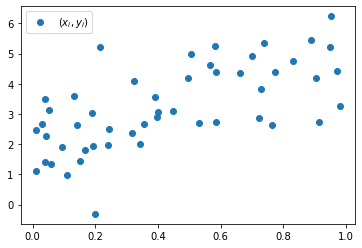

In [7]:
plt.plot(x,y,'o',label=r'$(x_i,y_i)$')
plt.legend()

`2`. `1`과 같은 자료를 잘 표현할 수 있는 적절한 추세선
$(x_i, \hat{y}_i)$를 그리기 위하여 아래의 수식을 고려하자.

-   $\hat{y}_i = ax_i+b$

a,b를 각각 아래의 표에 의하여 선택하였을 경우 추세선을 문제하단에 명시된
요구사항에 맞추어 시각화하라.

|       |  $a$  | $b$ |
|:-----:|:-----:|:---:|
| \(a\) |  $1$  | $0$ |
| \(b\) | $2.5$ | $2$ |
| \(c\) |  $3$  | $2$ |

**요구사항**

-   $(x_i,y_i)$를 산점도로 그리고 각 (a),(b),(c)에 대한
    $(x_i,\hat{y}_i)$를 lineplot으로 겹쳐그릴 것
-   범례를 포함할 것

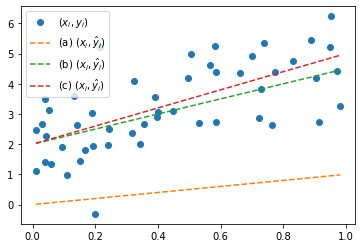

In [20]:
plt.plot(x,y,'o',label=r'$(x_i,y_i)$')
plt.plot(x,1*x+0,'--',label=r'(a) $(x_i,\hat{y}_i)$')
plt.plot(x,2.5*x+2,'--',label=r'(b) $(x_i,\hat{y}_i)$')
plt.plot(x,3*x+2,'--',label=r'(c) $(x_i,\hat{y}_i)$')
plt.legend()

`3`. 아래를 각각 계산하라.

`(a)` $\frac{1}{n}\sum_{i=1}^{n}(y_i-x_i)^2$

`(b)` $\frac{1}{n}\sum_{i=1}^{n}(y_i-2-2.5x_i)^2$

`(c)` $\frac{1}{n}\sum_{i=1}^{n}(y_i-2-3x_i)^2$

가장 작은 값을 가지는 것은 무엇인가?

(풀이)

In [32]:
np.mean((y-(1*x+0))**2), np.mean((y-(2.5*x+2))**2), np.mean((y-(3*x+2))**2)

가장 작은 값을 가지는 것은 (c)이다.

`4`. 3의 결과를 근거로 (a)-(c)중 가장 적절한 추세선을 판단하고 적절한
순서대로 나열하라.

`(풀이)`

3-(a),(b),(c)는 각각

-   $\hat{y}_i=x_i$
-   $\hat{y}_i=2+2.5x_i$
-   $\hat{y}_i=2+3x_i$

일 경우

$${\tt mse}({\boldsymbol y}, \hat{\boldsymbol y}) = \frac{1}{n}\sum_{i=1}^{n}(y_i -\hat{y}_i)^2$$

를 계산한 것이라 해석할 수 있다. 그런데
${\tt mse}({\boldsymbol y}, \hat{\boldsymbol y})$의 값은

-   $y_1 \approx \hat{y}_1$
-   $y_2 \approx \hat{y}_2$
-   $\dots$
-   $y_n \approx \hat{y}_n$

일수록 작은 값을 가진다. 그리고 위의 조건은 더 적절하게 추세선을
그렸을때 만족된다. 요약하면

-   적절한 추세선을 그림 $\Rightarrow$ $y_i \approx \hat{y}_i$
    $\Rightarrow$ ${\tt mse}({\boldsymbol y}, \hat{\boldsymbol y})$ 값이
    작아짐

와 같은 관계가 있음을 파악할 수 있다. 따라서
${\tt mse}({\boldsymbol y}, \hat{\boldsymbol y})$의 값이 작을수록 적절한
추세선이라 생각할 수 있다.

`5`. 아래와 같은 수식을 이용하여 $\hat{\beta}_0, \hat{\beta}_1$ 을
계산하라.

$$\begin{bmatrix} \hat{\beta}_0 \\ \hat{\beta}_1 \end{bmatrix} = ({\bf X}^T {\bf X})^{-1}{\bf X}^T {\boldsymbol y}, \quad {\bf X}=\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots \\ 1 & x_n \end{bmatrix}$$

`(풀이)`

In [40]:
X = np.stack([[1]*50 ,x],axis=1)
np.linalg.inv(X.T @ X)@X.T@y 

$\hat{\beta}_0=1.97914281$ 이고 $\hat{\beta}_1= 2.90834079$ 이다.

`6`. `5`에서 계산된 $\hat{\beta}_0, \hat{\beta}_1$을 각각
$b=\hat{\beta}_0, a=\hat{\beta}_1$으로 생각하고 적절한 추세선
$(x_i, \hat{y}_i)$를 그려라. (단, $\hat{y}_i=ax_i+b$ 이다)

`(풀이)`

In [43]:
b, a = np.linalg.inv(X.T @ X)@X.T@y 
yhat = a*x +b 

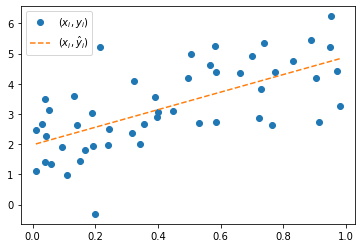

In [47]:
plt.plot(x,y,'o',label=r'$(x_i,y_i)$')
plt.plot(x,yhat,'--',label=r'$(x_i,\hat{y}_i)$')
plt.legend()

`7`. 4의 기준에 따르면, $(a,b)=(3,2)$ 일때 만들어지는 추세선과
$(a,b)=(\hat{\beta}_1,\hat{\beta}_0)$ 일때 만들어지는 추세선은 어떤 것이
더 적절한가?

`(풀이)`

In [51]:
np.mean((y-(3*x+2))**2), np.mean((y-yhat)**2)

# MNIST data

아래는 0~9가지의 숫자이미지가 저장된 이미지데이터를 불러오는 코드이다.

In [52]:
# URL 설정
url = 'https://github.com/guebin/PP2023/raw/main/posts/02_PY4DS/mnist.npz'

# URL에서 파일 다운로드
urllib.request.urlretrieve(url, './mnist.npz')

# 데이터 로드
data = np.load('./mnist.npz')
xtrain, ytrain, xtest, ytest = data['x_train'], data['y_train'], data['x_test'], data['y_test']

아래는 데이터에 대한 설명이다.

-   전체의 이미지의 수는 70000개이며, 60000개의 이미지 ${\tt xtrain}$에
    10000개의 이미지는 ${\tt xtest}$에 저장되어 있다.
-   이미지에 대한 라벨은 각각 ${\tt ytrain}$과 $\tt ytest$에 저장되어
    있다. 따라서 $\tt ytrain$에는 60000개의 이미지에 해당하는 라벨이,
    $\tt ytest$에는 10000개의 이미지에 해당하는 라벨이 기록되어 있다.
-   보통 분석에서는 60000개의 이미지를 가지고 라벨을 맞추는 “훈련”을
    하고 (${\tt xtrain}$을 이용하여 ${\tt ytrain}$을 맞추는 방법을
    학습하고), 그러한 훈련이 잘 되었는지 10000개의 이미지를 이용하여
    “테스트”한다.
-   위와 같은 의미로 $({\tt xtrain}, {\tt ytrain})$ 을 training data
    set, $({\tt xtest},{\tt ytest})$ 를 test data set 이라고 부른다.
    (ref:
    [위키참고](https://en.wikipedia.org/wiki/Training,_validation,_and_test_data_sets))

아래는 이미지자료와 시각화에 대한 설명이다.

-   각 이미지는 (28,28) 픽셀의 흑백이미지이다. 따라서 각 이미지는
    (28,28,3) 이 아니라 (28,28) 의 shape을 가진 텐서로 구성되어있다.
-   흑백이미지를 시각화 하기 위해서는 `plt.imshow(img, cmap='gray')`를
    이용한다. 여기에서 ${\tt img}$은 임의의 2차원 텐서이며 이 예제의
    경우 (28,28)의 shape을 가진다.

아래는 ${\tt xtrain}$의 두번째 이미지, 즉 ${\tt xtrain[1,:,:]}$를
확인하는 코드의 예시이다.

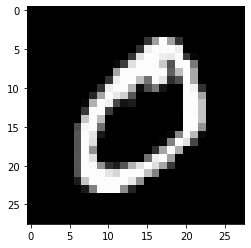

In [78]:
# plt.imshow(xtrain[1,:,:],cmap='gray')
plt.imshow(xtrain[1],cmap='gray') ## 같은코드임

이 이미지에 대한 label은 ${\tt ytrain[1]}$의 값으로 확인가능하다.

In [9]:
ytrain[1]

이미지와 라벨을 한번에 표현하는 코드는 아래와 같이 작성가능하다.

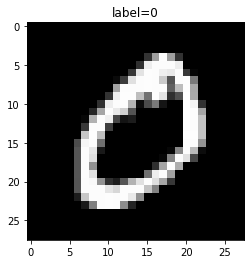

In [88]:
plt.imshow(xtrain[1],cmap='gray')
plt.title('label={}'.format(ytrain[1]));

아래는 10개의 이미지를 라벨과 함께 출력하는 코드의 예시이다.

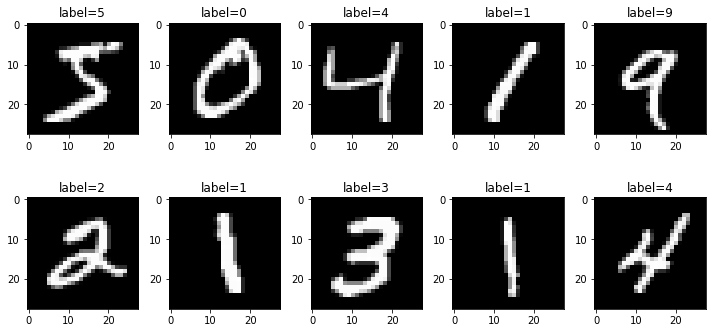

In [95]:
fig, ax = plt.subplots(2,5,figsize=(10,5))

ax[0][0].imshow(xtrain[0],cmap='gray'); ax[0][0].set_title('label={}'.format(ytrain[0]));
ax[0][1].imshow(xtrain[1],cmap='gray'); ax[0][1].set_title('label={}'.format(ytrain[1]));
ax[0][2].imshow(xtrain[2],cmap='gray'); ax[0][2].set_title('label={}'.format(ytrain[2]));
ax[0][3].imshow(xtrain[3],cmap='gray'); ax[0][3].set_title('label={}'.format(ytrain[3]));
ax[0][4].imshow(xtrain[4],cmap='gray'); ax[0][4].set_title('label={}'.format(ytrain[4]));

ax[1][0].imshow(xtrain[5],cmap='gray'); ax[1][0].set_title('label={}'.format(ytrain[5]));
ax[1][1].imshow(xtrain[6],cmap='gray'); ax[1][1].set_title('label={}'.format(ytrain[6]));
ax[1][2].imshow(xtrain[7],cmap='gray'); ax[1][2].set_title('label={}'.format(ytrain[7]));
ax[1][3].imshow(xtrain[8],cmap='gray'); ax[1][3].set_title('label={}'.format(ytrain[8]));
ax[1][4].imshow(xtrain[9],cmap='gray'); ax[1][4].set_title('label={}'.format(ytrain[9]));

fig.tight_layout()


`(1)` 70000개의 이미지중 0~9에 해당하는 이미지는 각각 몇장씩 들어있는가?

(풀이)

In [105]:
_y = ytrain.tolist()+ytest.tolist()

In [111]:
{s:_y.count(s) for s in set(_y)}

`(2)` ${\tt xtrain}$에서 손글씨 0을 의미하는 이미지만을 모아서 새로운
텐서 ${\tt xtrain0}$를 만들어라. 이 텐서에서 처음과 마지막 이미지를
출력하라.

**hint:** ${\tt xtrain0}$ 의 shape은 (5923,28,28)이어야 한다.

(풀이)

In [117]:
xtrain0 = xtrain[ytrain==0]
xtrain0.shape

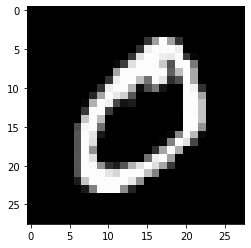

In [119]:
plt.imshow(xtrain0[0],cmap='gray') # 처음이미지

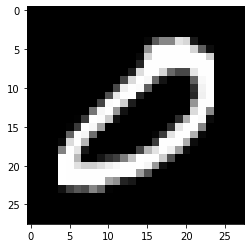

In [120]:
plt.imshow(xtrain0[-1],cmap='gray') # 마지막이미지

`(3)` ${\tt xtrain}$에서 손글씨 0을 의미하는 이미지의 평균을 계산하라.
즉 아래를 계산하라.

-   ${\tt xtrain0mean} = \frac{1}{5923}\sum_{i=1}^{5923} {\tt xtrain0[i, :, :]}$

계산결과를 출력하라.

(풀이)

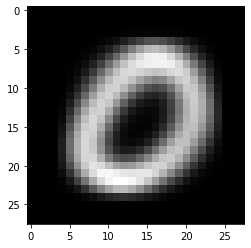

In [131]:
plt.imshow(xtrain0.mean(axis=0),cmap='gray')

`(4)` ${\tt xtrain}$에서 각 라벨에 대한 평균이미지를 계산하고 계산결과를
${\tt imgmean}$에 길이가 10인 `list`로 저장하라. 즉 ${\tt imgmean}$은
아래와 같은 자료구조를 가지고 있어야 한다.

-   ${\tt imgmean}=\big[{\tt imgmean[0]},\dots, {\tt imgmean[9]}\big]$
-   ${\tt imgmean[0]}, \dots, {\tt imgmean[9]}$ 는 각각 (28,28)의
    shape을 가진 numpy array
-   ${\tt imgmean[0]}, \dots, {\tt imgmean[9]}$ 는 각각 숫자 0,1, …, 9의
    평균이미지를 의미

${\tt imgmean[0]},\dots, {\tt imgmean[9]}$를 시각화 하라.

(풀이)

In [133]:
imgmean = [xtrain[ytrain==i].mean(axis=0) for i in range(10)] 

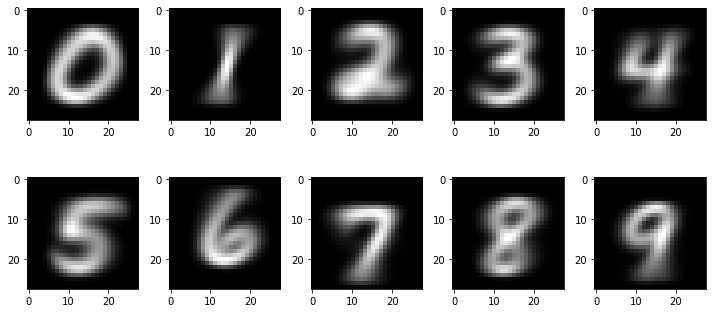

In [137]:
fig, ax = plt.subplots(2,5,figsize=(10,5))

ax[0][0].imshow(imgmean[0],cmap='gray')
ax[0][1].imshow(imgmean[1],cmap='gray')
ax[0][2].imshow(imgmean[2],cmap='gray')
ax[0][3].imshow(imgmean[3],cmap='gray')
ax[0][4].imshow(imgmean[4],cmap='gray')

ax[1][0].imshow(imgmean[5],cmap='gray')
ax[1][1].imshow(imgmean[6],cmap='gray')
ax[1][2].imshow(imgmean[7],cmap='gray')
ax[1][3].imshow(imgmean[8],cmap='gray')
ax[1][4].imshow(imgmean[9],cmap='gray')

fig.tight_layout()


`(5)` ${\tt xtrain}$의 두번째 이미지와 ${\tt imgmean[0]}$의 차이를
제곱한 값의 평균을 구하라. 즉 아래를 계산하라.

-   $\frac{1}{28\times 28} \sum_{p=0}^{27}\sum_{q=0}^{27}\big({\tt xtrain[1,p,q]}-{\tt imgmean[0][p,q]}\big)^2$

(풀이)

In [151]:
np.mean((xtrain[1,:,:]- imgmean[0])**2)

`(6)` 모든 $j=0,1,\dots,9$ 에 대하여 아래를 계산하라.

-   $\frac{1}{28\times 28} \sum_{p=0}^{27}\sum_{q=0}^{27}\big({\tt xtrain[1,p,q]}-{\tt imgmean[j][p,q]}\big)^2$

계산값이 가장 작게 나오는 $j$는 얼마인가? 위의 계산결과를 토대로
${\tt xtrain}$의 두번째 이미지는 어떠한 숫자를 의미한다고 “분류”하는
것이 타당한가?

In [152]:
[np.mean((xtrain[1,:,:]- imgmean[i])**2) for i in range(10)]

`(7)` 아래와 같은 numpy array 를 생성하라.

$${\tt loss}= 
\begin{bmatrix} 
{\tt loss[0,0]} & \dots & {\tt loss[0,9]} \\ 
{\tt loss[1,0]} & \dots & {\tt loss[1,9]} \\ 
\dots & \dots &  \dots \\ 
{\tt loss[59999,0]}& \dots &{\tt loss[59999,9]} \\ 
\end{bmatrix}$$

단,
${\tt loss[i,j]} = \frac{1}{28\times 28} \sum_{p=0}^{27}\sum_{q=0}^{27}\big({\tt xtrain[i,p,q]}-{\tt imgmean[j][p,q]}\big)^2$

위에서 생성한 ${\tt loss}$를 이용해 (6)와 같은 방식으로 ${\tt xtrain}$의
모든 이미지에 대한 분류를 수행하라.

**hint**: ${\tt loss}$에서 “최소값을 가지는 원소의 인덱스를 출력”하는
함수를 각 행별로 적용하면 된다.

(풀이)

In [169]:
loss = np.array([[np.mean((xtrain[j,:,:]- imgmean[i])**2) for i in range(10)] for j in range(60000)])

In [171]:
loss.argmin(axis=1)

`(8)` `(7)`에서 수행한 분류결과와 실제 라벨 ${\tt ytrain}$을 비교하라.
얼마나 많은 결과가 일치하는지 비율을 계산하라.

(풀이)

In [176]:
np.sum(ytrain == loss.argmin(axis=1)) / 60000

`(9)` ${\tt xtrain}$에서 학습한 평균이미지 ${\tt imgmean}$를 바탕으로
${\tt xtest}$의 이미지를 분류하라. 분류결과를 ${\tt ytest}$와 비교하라.
얼마나 많은 결과가 일치하는지 비율을 계산하라.

(풀이)

In [183]:
est = np.array([[np.mean((xtest[j,:,:]- imgmean[i])**2) for i in range(10)] for j in range(10000)]).argmin(axis=1)

In [186]:
np.sum(est == ytest)/10000

`(10)` `(9)`의 과정에서 잘못분류된 이미지 10개를 선택하여 시각화 하라.

-   실제 라벨과 잘못된 라벨을 구분하여 시각화 할 것

In [191]:
_ytest = ytest[est != ytest]
_xtest = xtest[est != ytest]
_est = est[est != ytest]

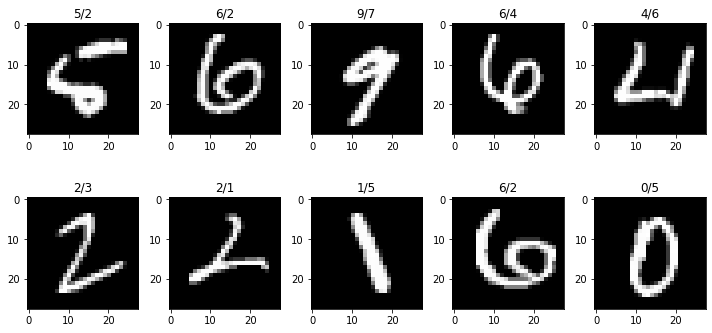

In [196]:
fig, ax = plt.subplots(2,5,figsize=(10,5))

ax[0][0].imshow(_xtest[0],cmap='gray'); ax[0][0].set_title('{}/{}'.format(_ytest[0],_est[0]));
ax[0][1].imshow(_xtest[1],cmap='gray'); ax[0][1].set_title('{}/{}'.format(_ytest[1],_est[1]));
ax[0][2].imshow(_xtest[2],cmap='gray'); ax[0][2].set_title('{}/{}'.format(_ytest[2],_est[2]));
ax[0][3].imshow(_xtest[3],cmap='gray'); ax[0][3].set_title('{}/{}'.format(_ytest[3],_est[3]));
ax[0][4].imshow(_xtest[4],cmap='gray'); ax[0][4].set_title('{}/{}'.format(_ytest[4],_est[4]));

ax[1][0].imshow(_xtest[5],cmap='gray'); ax[1][0].set_title('{}/{}'.format(_ytest[5],_est[5]));
ax[1][1].imshow(_xtest[6],cmap='gray'); ax[1][1].set_title('{}/{}'.format(_ytest[6],_est[6]));
ax[1][2].imshow(_xtest[7],cmap='gray'); ax[1][2].set_title('{}/{}'.format(_ytest[7],_est[7]));
ax[1][3].imshow(_xtest[8],cmap='gray'); ax[1][3].set_title('{}/{}'.format(_ytest[8],_est[8]));
ax[1][4].imshow(_xtest[9],cmap='gray'); ax[1][4].set_title('{}/{}'.format(_ytest[9],_est[9]));

fig.tight_layout()

# FIFA23 자료분석

아래는 FIFA23 자료를 불러오는 코드이다.

In [201]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/FIFA23_official_data.csv').drop(columns=['Loaned From', 'Best Overall Rating']).dropna()
df.head()

`(1)` 선수들의 평균임금(Wage)을 구하라.

# 삼성전자와 SK하이닉스

아래는 삼성전자와 SK하이닉스의 주가를 load하는 코드이다.

In [227]:
import yfinance as yf

# 삼성전자와 SK하이닉스의 종목 코드
tickers = ["005930.KS", "017670.KS"]

# 주가 데이터를 불러올 기간
start_date = "2021-01-01"
end_date = "2023-05-02"

# yfinance를 이용하여 데이터 다운로드
df = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
df.columns = pd.Index(['삼성전자','SKT']) 

# 데이터 확인
df

[*********************100%***********************]  2 of 2 completed